<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment10/Session10_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install albumentations

In [6]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from traing import *
from torchsummary import summary

# getting the data
trainloader, testloader, classes = getData()



Files already downloaded and verified
Files already downloaded and verified


In [7]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


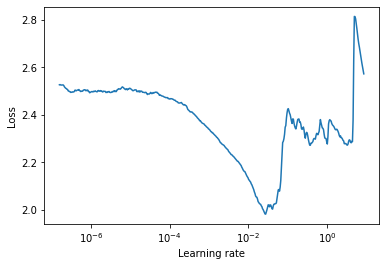

In [8]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [9]:
# Training starts here
Training(1,model,device, trainloader, testloader )


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4151153564453125 Batch_id=390 Accuracy=39.56: 100%|██████████| 391/391 [00:36<00:00, 10.68it/s]



Test set: Average loss: -4.1315, Accuracy: 5244/10000 (52.44%)



In [10]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 63 %
Accuracy of   car : 68 %
Accuracy of  bird : 15 %
Accuracy of   cat : 41 %
Accuracy of  deer : 53 %
Accuracy of   dog : 28 %
Accuracy of  frog : 66 %
Accuracy of horse : 56 %
Accuracy of  ship : 62 %
Accuracy of truck : 44 %


In [7]:
from GradCam import show_map
import matplotlib.pyplot as plt

heat_map, result = show_map()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


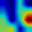

In [8]:
transforms.ToPILImage()(heat_map)

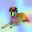

In [9]:
transforms.ToPILImage()(result)